In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

In [2]:
# Load the saved model
model = tf.keras.models.load_model("../models/potato_mobilenetv2_model.h5")

TypeError: Error when deserializing class 'DepthwiseConv2D' using config={'name': 'expanded_conv_depthwise', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}.

Exception encountered: Unrecognized keyword arguments passed to DepthwiseConv2D: {'groups': 1}

In [33]:
# Define the image file path
# image_path = "C:/Users/ASUS/Desktop/test img/potato_late-blight.jpg"

In [46]:
# Define the image file path
image_path = "C:/Users/ASUS/Desktop/test img/pothealthy.JPG"

In [47]:
# Load and preprocess the image
img = image.load_img(image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create a batch

In [48]:
# Preprocess the input image (same preprocessing as during training)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

In [49]:
# Make predictions
predictions = model.predict(img_array)

# Decode predictions
predicted_class = np.argmax(predictions[0])
class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']  # Define your class names
predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)

1/1 [==============================] - 0s 42ms/step
Predicted class: Potato___healthy


1/1 [==============================] - 1s 670ms/step


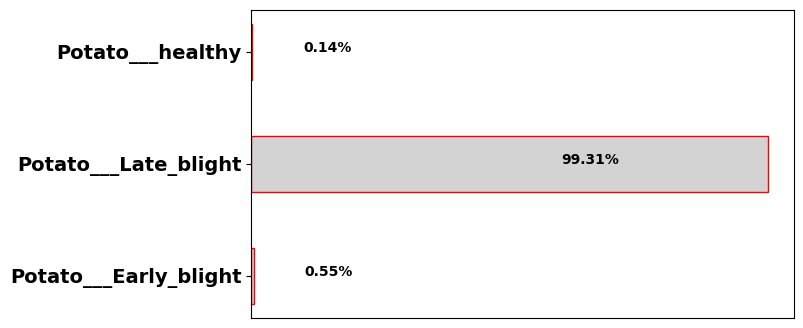

In [60]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

def prediction(img_path, model):
    class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

    # Load and preprocess the image
    my_image = load_img(img_path, target_size=(256, 256))
    my_image = img_to_array(my_image)
    my_image = np.expand_dims(my_image, 0)
    my_image = my_image.astype('float32')/ 255
    # my_image = tf.keras.applications.vgg16.preprocess_input(my_image)

    # Make predictions
    prediction_output = model.predict(my_image)

    # Plot the predictions
    fig = plt.figure(figsize=(7, 4))
    plt.barh(class_names, prediction_output[0], color='lightgray', edgecolor='red', linewidth=1, height=0.5)

    for index, value in enumerate(prediction_output[0]):
        plt.text(value / 2 + 0.1, index, f"{100 * value:.2f}%", fontweight='bold')

    plt.xticks([])
    plt.yticks([0, 1, 2], labels=class_names, fontweight='bold', fontsize=14)
    plt.savefig('pred_img.png', bbox_inches='tight')
    plt.show()

# Load pre-trained model
model = tf.keras.models.load_model("../model_h5/potato_mobilenetv2_model.h5")

# Path to the image for prediction
img_path = "C:/Users/ASUS/Desktop/test img/potato_late-blight.jpg"

# Make predictions
prediction(img_path, model)